In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

In [4]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
import pandas as pd
from scipy import stats

In [8]:
from scipy.stats import chi2_contingency

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
bias = pd.read_csv('C:/Users/elean/Downloads/Risk_of_Bias.csv')

In [12]:
bias.head()

,Study ID,Study Class,Treatment Focus,Total N Randomized (Study level),Selection Bias: Randomization Adequate,Selection Bias: Allocation Concealment Adequate,Selection Bias: Groups Similar at Baseline,Selection Bias: ITT Analysis,Performance Bias: Care Providers Masked,Performance Bias: Patients Masked,...,Veteran Percent (Study level),Community Percent (Study level),Female Percent (Study level),Female Percent Detail (Study level),Male Percent (Study level),Trauma Type (Study level),Trauma Detail (Study level),Citation,PTSDPubs ID,Year Added to PTSD-Repository
0,acarturk2016,Psychotherapy,PTSD,98,Yes,Yes,Unclear,Yes,No,No,...,NaN,1.0,0.7449,NaN,0.2551,Terrorism/political violence/forced displacement,NaN,"Acarturk C, Konuk E, Cetinkaya M, et al. The e...",45262.0,2019
1,acierno2017,Psychotherapy,PTSD,150,Yes,Yes,Yes,No,No,No,...,1.0,NaN,0.0379,NaN,0.9621,Combat-related,NaN,"Acierno RE, Knapp RG, Tuerk PW, et al. A non-i...",45948.0,2019
2,adenauer2011,Psychotherapy,PTSD,34,Yes,Unclear,No,Yes,No,No,...,NaN,1.0,0.4412,NaN,0.5588,Terrorism/political violence/forced displacement,NaN,"Adenauer H, Catani C, Gola H, et al. Narrative...",37889.0,2019
3,ahmadi2015,Mixed: Psychotherapy & CIH,PTSD,48,Unclear,Unclear,Yes,No,No,No,...,0.0,0.0,0.0000,NaN,1.0000,Combat-related,NaN,"Ahmadi K, Hazrati M, Ahmadizadeh MJ, et al. RE...",46896.0,2019
4,ahmadizadeh2018,Nonpharmacologic biological,PTSD,65,Unclear,Unclear,Yes,Yes,No,Yes,...,1.0,0.0,0.0000,NaN,1.0000,Combat-related,NaN,"Ahmadizadeh MJ, Rezaei M. Unilateral right and...",50480.0,2019


In [13]:
bias.mean()

Total N Randomized (Study level)          82.966581
Attrition Overall Greater Than 20%         0.315994
Active Duty Military (Study level)         0.094748
Veteran Percent (Study level)              0.723692
Community Percent (Study level)            0.608769
Female Percent (Study level)               0.460399
Male Percent (Study level)                 0.539886
PTSDPubs ID                           100595.570248
Year Added to PTSD-Repository           2019.226221
dtype: float64

In [14]:
bias.columns

Index(['Study ID', 'Study Class', 'Treatment Focus',
       'Total N Randomized (Study level)',
       'Selection Bias: Randomization Adequate',
       'Selection Bias: Allocation Concealment Adequate',
       'Selection Bias: Groups Similar at Baseline',
       'Selection Bias: ITT Analysis',
       'Performance Bias: Care Providers Masked',
       'Performance Bias: Patients Masked',
       'Detection Bias: Outcome Assessors Masked',
       'Attrition Overall Less Than or Equal to 20%',
       'Attrition Overall Greater Than 20%',
       'Attrition Differential Less Than or Equal to 15%',
       'Attrition Differential Greater Than 15%',
       'Additional Quantitative Data Reported',
       'Reporting Bias: All Prespecified Outcomes Reported',
       'Reporting Bias: Method of Handling Dropouts',
       'Reporting Bias: Detail of Other Methods of Handling Dropouts',
       'Outcome Measures Equal Valid and Reliable',
       'Study Reports Adequate Treatment Fidelity Based on Measure

# Recode & Rename

In [15]:
def male_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [16]:
bias['Male_recode'] = bias['Male Percent (Study level)'].apply(male_recode)

In [17]:
bias['Male_recode'].value_counts(dropna=False)

3    166
0     97
1     83
2     43
Name: Male_recode, dtype: int64

In [18]:
def fem_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [19]:
bias['Female_recode'] = bias['Female Percent (Study level)'].apply(fem_recode)

In [20]:
bias1 =bias[['Female Percent (Study level)', 'Male Percent (Study level)']].dropna()

In [21]:
bias['Female_recode'].value_counts(dropna=False)

0    141
3    124
2     81
1     43
Name: Female_recode, dtype: int64

In [22]:
def Vetern_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [23]:
bias['Veteran_recode'] = bias['Veteran Percent (Study level)'].apply(Vetern_recode)

In [24]:
bias['Veteran_recode'].value_counts(dropna=False)

3    332
0     46
1      7
2      4
Name: Veteran_recode, dtype: int64

In [25]:
def Military_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [26]:
bias2 =bias[['Active Duty Military (Study level)', ]].dropna()

In [27]:
bias['Military_recode'] = bias['Active Duty Military (Study level)'].apply(Military_recode)

In [28]:
bias['Military_recode'].value_counts(dropna=False)

3    234
0    151
1      2
2      2
Name: Military_recode, dtype: int64

In [29]:
bias2 =bias[['Risk of Bias Rating', ]].dropna()

In [30]:
def trauma_recode (series):
    if pd.isnull(series):
        return 0
    else:
        return 1
    

In [31]:
bias['trauma_recode'] = bias['Trauma Detail (Study level)'].apply(trauma_recode)

In [32]:
bias['trauma_recode']

0      0
1      0
2      0
3      0
4      0
      ..
384    0
385    1
386    1
387    1
388    0
Name: trauma_recode, Length: 389, dtype: int64

In [33]:
bias2 =bias[['trauma_recode',]].dropna()

In [34]:
bias['trauma_recode']

0      0
1      0
2      0
3      0
4      0
      ..
384    0
385    1
386    1
387    1
388    0
Name: trauma_recode, Length: 389, dtype: int64

In [35]:
bias['trauma_recode'].value_counts(dropna=False)

1    199
0    190
Name: trauma_recode, dtype: int64

In [36]:
bias['trauma_recode'].unique()

array([0, 1], dtype=int64)

In [37]:
bias['Risk of Bias Rating']

0      Medium
1      Medium
2        High
3        High
4      Medium
        ...  
384      High
385      High
386    Medium
387    Medium
388      High
Name: Risk of Bias Rating, Length: 389, dtype: object

In [38]:
bias.head()

,Study ID,Study Class,Treatment Focus,Total N Randomized (Study level),Selection Bias: Randomization Adequate,Selection Bias: Allocation Concealment Adequate,Selection Bias: Groups Similar at Baseline,Selection Bias: ITT Analysis,Performance Bias: Care Providers Masked,Performance Bias: Patients Masked,...,Trauma Type (Study level),Trauma Detail (Study level),Citation,PTSDPubs ID,Year Added to PTSD-Repository,Male_recode,Female_recode,Veteran_recode,Military_recode,trauma_recode
0,acarturk2016,Psychotherapy,PTSD,98,Yes,Yes,Unclear,Yes,No,No,...,Terrorism/political violence/forced displacement,NaN,"Acarturk C, Konuk E, Cetinkaya M, et al. The e...",45262.0,2019,1,2,3,3,0
1,acierno2017,Psychotherapy,PTSD,150,Yes,Yes,Yes,No,No,No,...,Combat-related,NaN,"Acierno RE, Knapp RG, Tuerk PW, et al. A non-i...",45948.0,2019,3,0,3,3,0
2,adenauer2011,Psychotherapy,PTSD,34,Yes,Unclear,No,Yes,No,No,...,Terrorism/political violence/forced displacement,NaN,"Adenauer H, Catani C, Gola H, et al. Narrative...",37889.0,2019,2,1,3,3,0
3,ahmadi2015,Mixed: Psychotherapy & CIH,PTSD,48,Unclear,Unclear,Yes,No,No,No,...,Combat-related,NaN,"Ahmadi K, Hazrati M, Ahmadizadeh MJ, et al. RE...",46896.0,2019,3,0,0,3,0
4,ahmadizadeh2018,Nonpharmacologic biological,PTSD,65,Unclear,Unclear,Yes,Yes,No,Yes,...,Combat-related,NaN,"Ahmadizadeh MJ, Rezaei M. Unilateral right and...",50480.0,2019,3,0,3,0,0


In [39]:
bias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 40 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Study ID                                                                               389 non-null    object 
 1   Study Class                                                                            389 non-null    object 
 2   Treatment Focus                                                                        389 non-null    object 
 3   Total N Randomized (Study level)                                                       389 non-null    int64  
 4   Selection Bias: Randomization Adequate                                                 389 non-null    object 
 5   Selection Bias: Allocation Concealment Adequate                               

# corrlation 

In [40]:
bias['Female_recode'].corr(bias['Male_recode'])       

-0.8331822757513321

In [41]:
bias.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Reds_r'), axis=1)

,Total N Randomized (Study level),Attrition Overall Greater Than 20%,Active Duty Military (Study level),Veteran Percent (Study level),Community Percent (Study level),Female Percent (Study level),Male Percent (Study level),PTSDPubs ID,Year Added to PTSD-Repository,Male_recode,Female_recode,Veteran_recode,Military_recode,trauma_recode
Total N Randomized (Study level),1.0,0.022,0.11,-0.063,-0.052,-0.049,0.049,-0.077,0.14,0.058,-0.085,-0.059,0.028,0.042
Attrition Overall Greater Than 20%,0.022,1.0,0.11,-0.11,-0.0018,-0.024,0.025,0.022,-0.03,0.00092,-0.036,-0.06,0.0099,0.12
Active Duty Military (Study level),0.11,0.11,1.0,-0.52,-0.16,-0.15,0.15,-0.051,-0.1,0.17,-0.15,-0.51,1.0,-0.09
Veteran Percent (Study level),-0.063,-0.11,-0.52,1.0,-0.78,-0.53,0.53,-0.0003,-0.34,0.51,-0.38,1.0,-0.32,-0.23
Community Percent (Study level),-0.052,-0.0018,-0.16,-0.78,1.0,0.74,-0.74,0.074,-0.16,-0.69,0.66,-0.038,0.69,0.35
Female Percent (Study level),-0.049,-0.024,-0.15,-0.53,0.74,1.0,-1.0,0.095,-0.058,-0.97,0.97,-0.036,0.46,0.3
Male Percent (Study level),0.049,0.025,0.15,0.53,-0.74,-1.0,1.0,-0.095,0.059,0.97,-0.97,0.036,-0.46,-0.3
PTSDPubs ID,-0.077,0.022,-0.051,-0.0003,0.074,0.095,-0.095,1.0,0.027,-0.059,0.091,0.03,0.04,-0.049
Year Added to PTSD-Repository,0.14,-0.03,-0.1,-0.34,-0.16,-0.058,0.059,0.027,1.0,0.07,-0.07,-0.38,-0.4,0.012
Male_recode,0.058,0.00092,0.17,0.51,-0.69,-0.97,0.97,-0.059,0.07,1.0,-0.83,0.034,-0.42,-0.29


In [42]:
print (bias.corr())

                                    Total N Randomized (Study level)  \
Total N Randomized (Study level)                            1.000000   
Attrition Overall Greater Than 20%                          0.022035   
Active Duty Military (Study level)                          0.107754   
Veteran Percent (Study level)                              -0.063362   
Community Percent (Study level)                            -0.051990   
Female Percent (Study level)                               -0.048866   
Male Percent (Study level)                                  0.049362   
PTSDPubs ID                                                -0.076728   
Year Added to PTSD-Repository                               0.136507   
Male_recode                                                 0.057996   
Female_recode                                              -0.084654   
Veteran_recode                                             -0.058840   
Military_recode                                             0.02

# histogram 

(array([141.,   0.,   0.,  43.,   0.,   0.,  81.,   0.,   0., 124.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

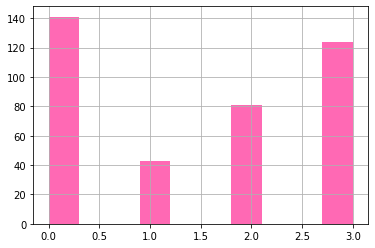

In [43]:
bias['Female_recode'].hist()
plt.hist(bias['Female_recode'], facecolor='hotpink')


(array([ 97.,   0.,   0.,  83.,   0.,   0.,  43.,   0.,   0., 166.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

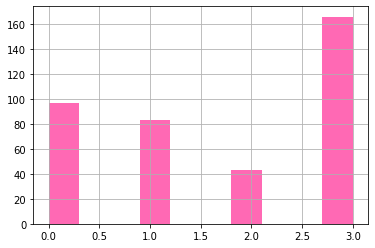

In [44]:
bias['Male_recode'].hist()
plt.hist(bias['Male_recode'], facecolor='hotpink')

(array([235.,   0.,   0.,   0.,   0., 132.,   0.,   0.,   0.,  22.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

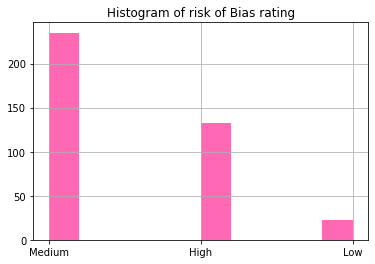

In [45]:
bias['Risk of Bias Rating'].hist()
plt.title('Histogram of risk of Bias rating')
plt.hist(bias['Risk of Bias Rating'], facecolor ='hotpink')

(array([151.,   0.,   0.,   2.,   0.,   0.,   2.,   0.,   0., 234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

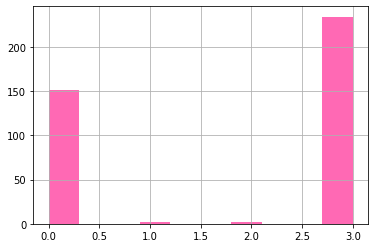

In [46]:
bias['Military_recode'].hist()
plt.hist(bias['Military_recode'], facecolor='hotpink')

(array([ 46.,   0.,   0.,   7.,   0.,   0.,   4.,   0.,   0., 332.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

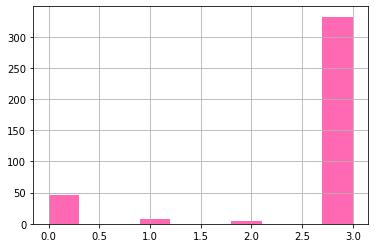

In [47]:
bias['Veteran_recode'].hist()
plt.hist(bias['Veteran_recode'], facecolor='hotpink')

In [48]:
bias.columns

Index(['Study ID', 'Study Class', 'Treatment Focus',
       'Total N Randomized (Study level)',
       'Selection Bias: Randomization Adequate',
       'Selection Bias: Allocation Concealment Adequate',
       'Selection Bias: Groups Similar at Baseline',
       'Selection Bias: ITT Analysis',
       'Performance Bias: Care Providers Masked',
       'Performance Bias: Patients Masked',
       'Detection Bias: Outcome Assessors Masked',
       'Attrition Overall Less Than or Equal to 20%',
       'Attrition Overall Greater Than 20%',
       'Attrition Differential Less Than or Equal to 15%',
       'Attrition Differential Greater Than 15%',
       'Additional Quantitative Data Reported',
       'Reporting Bias: All Prespecified Outcomes Reported',
       'Reporting Bias: Method of Handling Dropouts',
       'Reporting Bias: Detail of Other Methods of Handling Dropouts',
       'Outcome Measures Equal Valid and Reliable',
       'Study Reports Adequate Treatment Fidelity Based on Measure

# ttest

In [49]:
stats.ttest_1samp(bias['Female_recode'], 15)

Ttest_1sampResult(statistic=-209.69057588230226, pvalue=0.0)

In [50]:
stats.ttest_1samp(bias['Male_recode'], 15)

Ttest_1sampResult(statistic=-209.78224634437905, pvalue=0.0)

In [51]:
ttest_ind(bias['Female_recode'], bias['Male_recode'])

Ttest_indResult(statistic=-2.5603289632828967, pvalue=0.010645532321528605)

# crosstab

In [52]:
bias_crosstab1 = pd.crosstab(bias['Female_recode'], bias['Male_recode'])
bias_crosstab1

Male_recode,0,1,2,3
Female_recode,,,,
0,0,0,0,141
1,0,0,42,1
2,0,80,1,0
3,97,3,0,24


In [53]:
bias_crosstab2 = pd.crosstab(bias['Risk of Bias Rating'], bias['Male_recode'])
bias_crosstab2

Male_recode,0,1,2,3
Risk of Bias Rating,,,,
High,35,21,18,58
Low,2,4,1,15
Medium,60,58,24,93


In [54]:
bias_crosstab3 = pd.crosstab(bias['Risk of Bias Rating'], bias['Female_recode'])
bias_crosstab3

Female_recode,0,1,2,3
Risk of Bias Rating,,,,
High,46,17,21,48
Low,14,1,4,3
Medium,81,25,56,73


# Bias Histogram

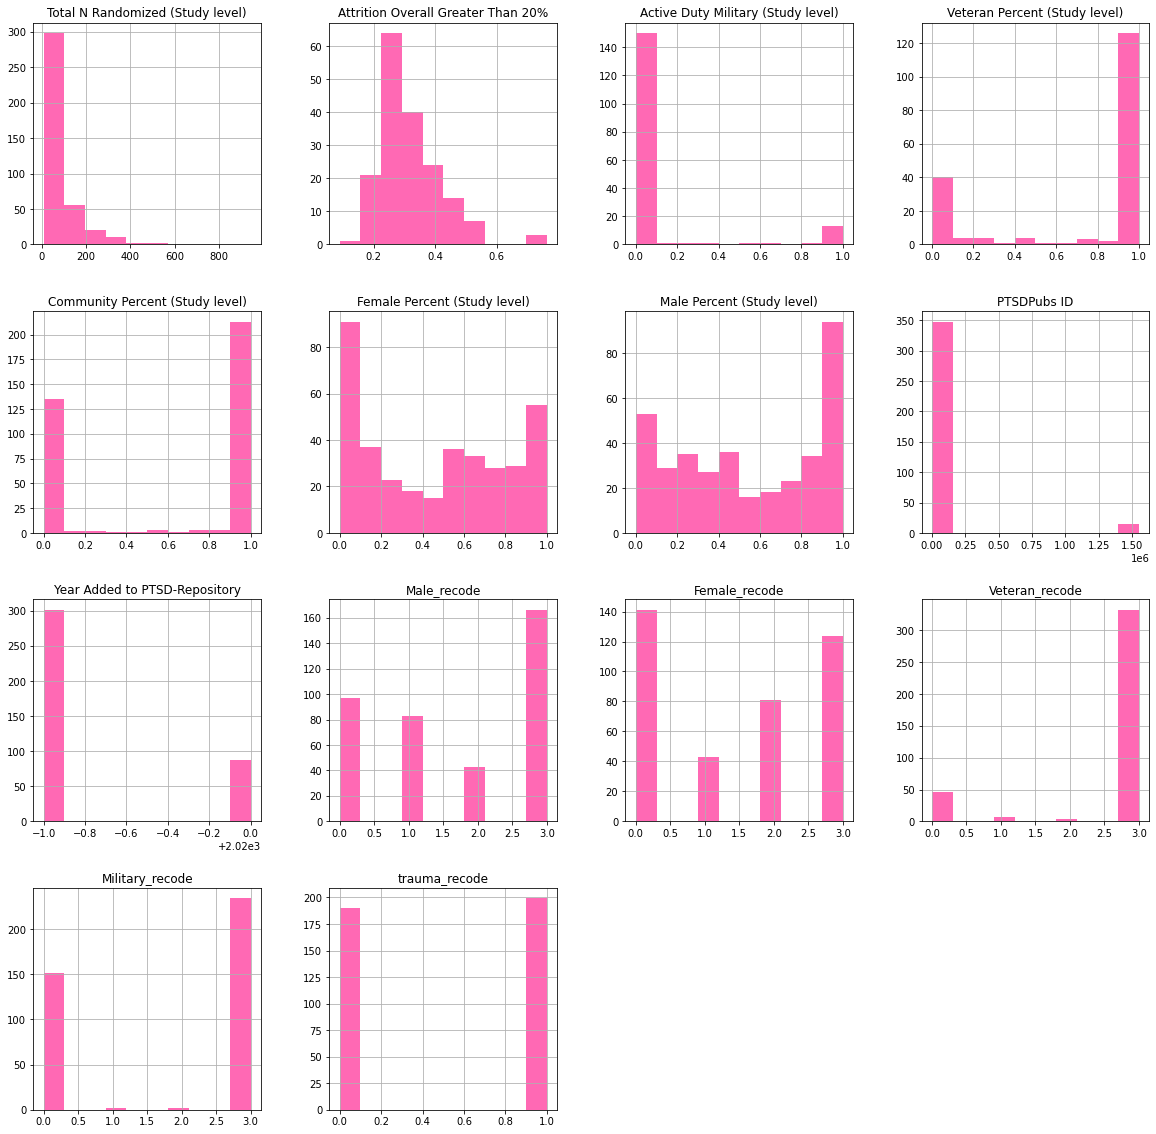

In [55]:

bias.hist(figsize= (20, 20), color = "hotpink")
plt.show()

In [56]:
h2=bias[['Risk of Bias Rating','Female_recode', 'Male_recode']]

# barplot 

<AxesSubplot:xlabel='Female_recode', ylabel='Risk of Bias Rating'>

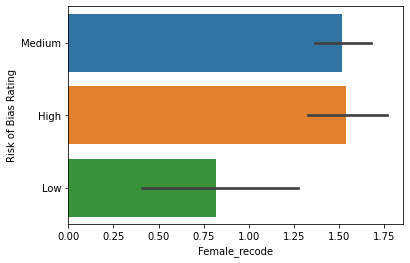

In [57]:
sns.barplot(data=bias, x='Female_recode',y='Risk of Bias Rating')


<AxesSubplot:xlabel='Female_recode', ylabel='Veteran_recode'>

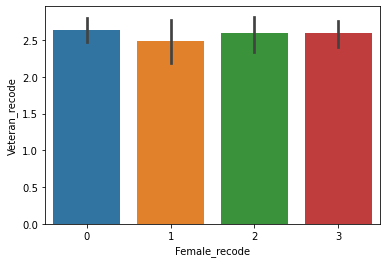

In [58]:
sns.barplot(data=bias, x='Female_recode',y='Veteran_recode')


<AxesSubplot:xlabel='Female_recode', ylabel='Military_recode'>

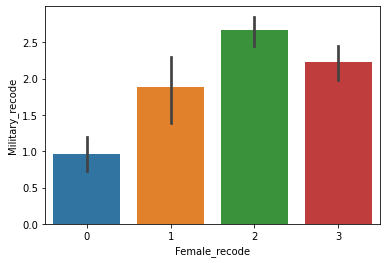

In [59]:
sns.barplot(data=bias, x='Female_recode',y='Military_recode')

Text(0, 0.5, 'Female_recode')

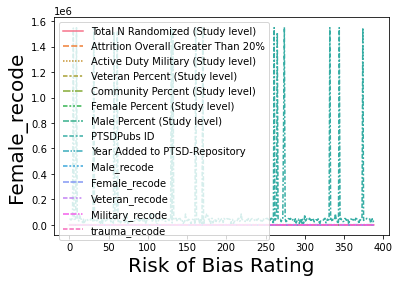

In [60]:
p = sns.lineplot(data =bias,)
p.set_xlabel("Risk of Bias Rating", fontsize = 20)
p.set_ylabel('Female_recode', fontsize = 20)


In [61]:
bias['Female Percent (Study level)'].unique()

array([0.7449, 0.0379, 0.4412, 0.    , 0.65  , 0.28  , 0.7857, 0.5294,
       0.6567, 0.875 , 0.091 , 0.193 , 0.8475, 0.871 , 0.0667, 0.1371,
          nan, 0.8182, 0.2143, 0.881 , 0.0556, 0.7347, 0.7   , 1.    ,
       0.0274, 0.8   , 0.733 , 0.457 , 0.79  , 0.507 , 0.5833, 0.52  ,
       0.9643, 0.5429, 0.23  , 0.4101, 0.6596, 0.9333, 0.0455, 0.6071,
       0.4365, 0.5625, 0.1017, 0.6744, 0.4603, 0.29  , 0.91  , 0.7308,
       0.7619, 0.7788, 0.541 , 0.66  , 0.0238, 0.0571, 0.0244, 0.162 ,
       0.34  , 0.0323, 0.825 , 0.806 , 0.24  , 0.4   , 0.3966, 0.5   ,
       0.5868, 0.098 , 0.309 , 0.1875, 0.1907, 0.556 , 0.4634, 0.7042,
       0.177 , 0.3455, 0.3944, 0.1202, 0.6515, 0.0339, 0.102 , 0.074 ,
       0.2282, 0.5714, 0.69  , 0.6522, 0.1207, 0.119 , 0.831 , 0.1915,
       0.9074, 0.0345, 0.1905, 0.139 , 0.2391, 0.1818, 0.1364, 0.36  ,
       0.5846, 0.2083, 0.6786, 0.2308, 0.823 , 0.9211, 0.11  , 0.6   ,
       0.8875, 0.3846, 0.5652, 0.62  , 0.2444, 0.2128, 0.1455, 0.0765,
      

In [62]:
CrossTable = pd.crosstab(bias['Military_recode'], bias['Veteran_recode'])


In [63]:
bias['Military_recode'].unique()

array([3, 0, 2, 1], dtype=int64)

In [64]:
   bias['Veteran_recode'].unique()

array([3, 0, 2, 1], dtype=int64)

# Stacked Bar

<AxesSubplot:xlabel='Male_recode'>

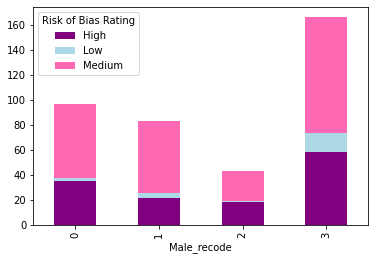

In [65]:
CrossTable2 = pd.crosstab(bias['Male_recode'], bias['Risk of Bias Rating'])
CrossTable2.plot.bar(stacked=True, color=['purple', 'lightblue', 'hotpink'])

<AxesSubplot:xlabel='Female_recode'>

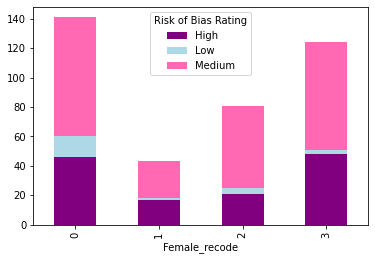

In [66]:
CrossTable2 = pd.crosstab(bias['Female_recode'], bias['Risk of Bias Rating'])
CrossTable2.plot.bar(stacked=True, color=['purple', 'lightblue', 'hotpink'])

<AxesSubplot:xlabel='Female_recode'>

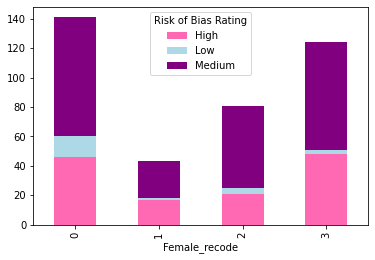

In [67]:
CrossTable = pd.crosstab(bias['Veteran_recode'],bias['trauma_recode'])
CrossTable2.plot.bar(stacked=True, color=['hotpink', 'lightblue', 'purple'])

<AxesSubplot:xlabel='Female_recode'>

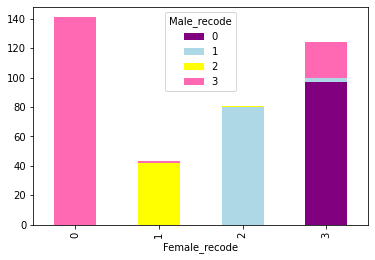

In [68]:
CrossTable1 = pd.crosstab(bias['Female_recode'], bias['Male_recode'])
CrossTable1.plot.bar(stacked=True, color=['purple', 'lightblue','yellow', 'hotpink'])

<AxesSubplot:xlabel='Male_recode'>

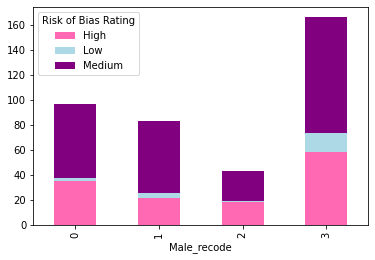

In [69]:
CrossTable = pd.crosstab(bias['Male_recode'], bias['Risk of Bias Rating'])
CrossTable.plot.bar(stacked=True, color=['hotpink', 'lightblue', 'purple'])

<AxesSubplot:xlabel='Female_recode'>

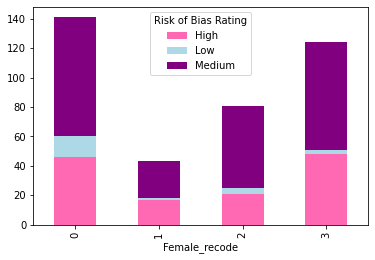

In [70]:
CrossTable = pd.crosstab(bias['Female_recode'], bias['Risk of Bias Rating'])
CrossTable.plot.bar(stacked=True, color=['hotpink', 'lightblue', 'purple'])

<AxesSubplot:xlabel='Female_recode'>

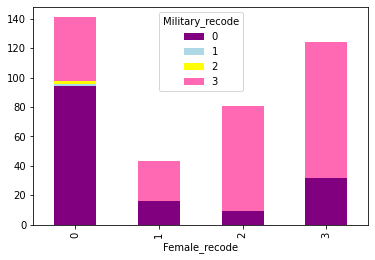

In [71]:
CrossTable = pd.crosstab(bias['Female_recode'], bias['Military_recode'])
CrossTable.plot.bar(stacked=True, color=['purple', 'lightblue', 'yellow', 'hotpink'])

<AxesSubplot:xlabel='Male_recode'>

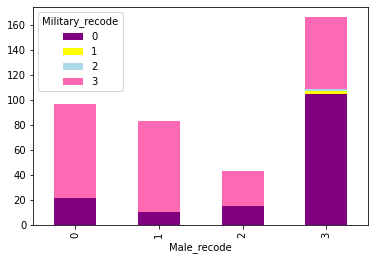

In [72]:
CrossTable = pd.crosstab(bias['Male_recode'],bias['Military_recode'])
CrossTable.plot.bar(stacked=True, color=['purple', 'yellow', 'lightblue', 'hotpink'])

<AxesSubplot:xlabel='Veteran_recode'>

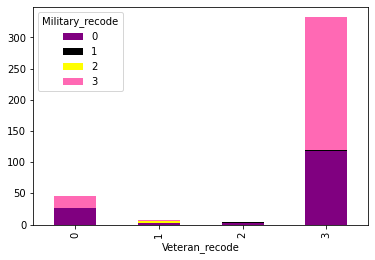

In [73]:
CrossTable1 = pd.crosstab(bias['Veteran_recode'],bias['Military_recode'])
CrossTable1.plot.bar(stacked=True, color=['purple', 'black', 'yellow', 'hotpink'])

<AxesSubplot:xlabel='Veteran_recode'>

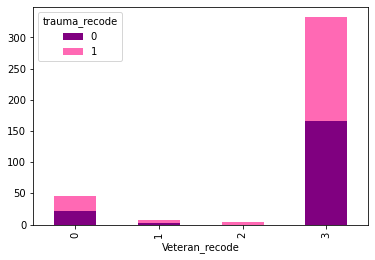

In [74]:
CrossTable2 = pd.crosstab(bias['Veteran_recode'],bias['trauma_recode'])
CrossTable2.plot.bar(stacked=True, color=['purple', 'hotpink'])

<AxesSubplot:xlabel='trauma_recode'>

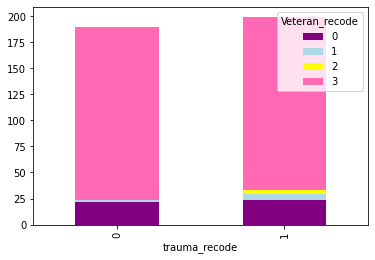

In [75]:
CrossTable3 = pd.crosstab(bias['trauma_recode'],bias['Veteran_recode'])
CrossTable3.plot.bar(stacked=True, color=['purple', 'lightblue', 'yellow', 'hotpink'])

In [76]:
from scipy.stats import chi2_contingency

 # Chi 2

In [77]:
stat, p, dlf, expected = chi2_contingency(bias_crosstab1)

In [78]:
print(stat)

998.5339809548447


In [79]:
print (p)

3.5700217301721944e-209


In [80]:
significance_level = 0.05
print("p value:"+ str(p))
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value:3.5700217301721944e-209
Reject NULL HYPOTHESIS


In [81]:
x = bias['Male_recode']
y = bias['Female_recode']
print (x, y)

0      1
1      3
2      2
3      3
4      3
      ..
384    0
385    0
386    1
387    0
388    2
Name: Male_recode, Length: 389, dtype: int64 0      2
1      0
2      1
3      0
4      0
      ..
384    3
385    3
386    2
387    3
388    1
Name: Female_recode, Length: 389, dtype: int64


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# decision tree

In [83]:
x = bias[['Male_recode','Veteran_recode','Military_recode']]
y = bias['trauma_recode']

In [84]:
x = bias[['trauma_recode','Veteran_recode','Military_recode']]
y = bias['Male_recode']

In [85]:
x.head()

,trauma_recode,Veteran_recode,Military_recode
0,0,3,3
1,0,3,3
2,0,3,3
3,0,0,3
4,0,3,0


In [86]:
y.head()

0    1
1    3
2    2
3    3
4    3
Name: Male_recode, dtype: int64

In [87]:
x = bias[['Female_recode','Veteran_recode','Military_recode']]
y = bias['trauma_recode']

In [88]:
x.head()

,Female_recode,Veteran_recode,Military_recode
0,2,3,3
1,0,3,3
2,1,3,3
3,0,0,3
4,0,3,0


In [89]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: trauma_recode, dtype: int64

In [90]:
x = bias[['trauma_recode','Veteran_recode','Military_recode', 'Female_recode']]
y = bias['Risk of Bias Rating']

In [91]:
x.head()

,trauma_recode,Veteran_recode,Military_recode,Female_recode
0,0,3,3,2
1,0,3,3,0
2,0,3,3,1
3,0,0,3,0
4,0,3,0,0


In [92]:
y.head()

0    Medium
1    Medium
2      High
3      High
4    Medium
Name: Risk of Bias Rating, dtype: object

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [94]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train , y_train )

DecisionTreeClassifier(random_state=76)

In [95]:
treePredictions = decisionTree.predict(x_test)
print (x_test)

     trauma_recode  Veteran_recode  Military_recode  Female_recode
360              1               3                0              0
387              1               3                0              3
166              1               3                3              1
176              1               2                1              0
330              1               3                3              3
..             ...             ...              ...            ...
72               1               3                3              2
7                1               3                3              3
309              1               3                3              3
320              1               3                3              2
62               0               3                3              3

[117 rows x 4 columns]


In [96]:
print(confusion_matrix(y_test, treePredictions))

[[ 1  0 37]
 [ 0  0  5]
 [ 4  1 69]]


In [97]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

        High       0.20      0.03      0.05        38
         Low       0.00      0.00      0.00         5
      Medium       0.62      0.93      0.75        74

    accuracy                           0.60       117
   macro avg       0.27      0.32      0.26       117
weighted avg       0.46      0.60      0.49       117



In [98]:
from sklearn.metrics import plot_confusion_matrix

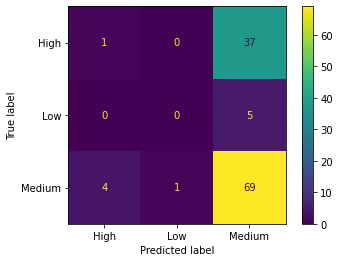

In [99]:
plot_confusion_matrix(decisionTree, x_test, y_test)
plt.show()

